In [1]:
%load_ext autoreload
%autoreload 2
import glob, sys
import numpy as np
import matplotlib.pyplot as plt
import time
from scipy.integrate import simps
import pyccl as ccl
import clmm
from clmm import Cosmology
def binning(corner): return [[corner[i],corner[i+1]] for i in range(len(corner)-1)]

In [3]:
cosmo_clmm_fid = Cosmology(H0 = 71.0, Omega_dm0 = 0.22, Omega_b0 = 0.04, Omega_k0 = 0.0)

In [4]:
def excess_surface_density_fct(R, logm, concentration, z, cosmo_clmm):
    "predict the standard well-centered excess surface density profile"
    excess_surface_density = clmm.compute_excess_surface_density(R, 10**logm, 
                                                                concentration, z, 
                                                                cosmo_clmm, delta_mdef=200,
                                                                halo_profile_model='nfw',
                                                                massdef='critical')
    return excess_surface_density

In [8]:
R = np.linspace(1, 3.5, 20)
cosmo_clmm = Cosmology(H0 = 71.0, Omega_dm0 = 0.22, Omega_b0 = 0.04, Omega_k0 = 0.0)
ds1 = excess_surface_density_fct(R, 14, 4, 0.5, cosmo_clmm)

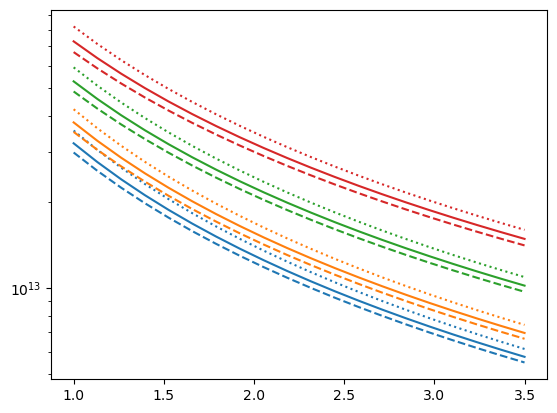

In [16]:
for k, logm in enumerate([14, 14.1, 14.3, 14.5]):
    cosmo_clmm = Cosmology(H0 = 71.0, Omega_dm0 = 0.265-0.04, Omega_b0 = 0.04, Omega_k0 = 0.0)
    ds1 = excess_surface_density_fct(R, logm, 4, 0.5, cosmo_clmm)
    plt.plot(R, ds1, color = 'C'+str(k))

    cosmo_clmm = Cosmology(H0 = 71.0, Omega_dm0 = 0.1-0.04, Omega_b0 = 0.04, Omega_k0 = 0.0)
    ds1 = excess_surface_density_fct(R, logm, 4, 0.5, cosmo_clmm)
    plt.plot(R, ds1, '--', color = 'C'+str(k))

    cosmo_clmm = Cosmology(H0 = 71.0, Omega_dm0 = 0.6-0.04, Omega_b0 = 0.04, Omega_k0 = 0.0)
    ds1 = excess_surface_density_fct(R, logm, 4, 0.5, cosmo_clmm)
    plt.plot(R, ds1, ':', color = 'C'+str(k))
plt.yscale('log')